In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import math
import sympy as sp

## 1. feladat
A standard lebegőpontos számok típusán értékelje ki a `6e23+2023.-6e23` kifejezést! Mit tapasztal?
A problémát javítandó készítsen okos összeadó függvényt, ami tetszőleges
elemszámú eltérő nagyságrendbe eső elemekből álló sorozat összegét számolja ki, törekedve
a legkisebb numerikus hibára!

In [3]:
float(6e23)+float(2023.-6e23) #első kiértékelés

0.0

Ha csak szimplán elvégezzük a műveleteteket úgy, hogy két összeadandó tag között nagy a nagyságrendbeli eltérés, hibás eredményt kapunk. Jelen esetben is 2023. helyett, 0-át kapunk az output-on.

In [4]:
TestNumbers = [6e23,2023.,-6e23] #fordítva

def summationv2(listofnumbers):
    '''
    A függvények átadott listát, a függvény abszolút érték szerint ("nagyságrend") csökkenő sorrendbe állítja,
    majd elvégzi az összeadást tagonként.
    '''
    
    sortedlist = sorted(listofnumbers, key = lambda x: abs(x),reverse = True) #A key paraméter, valamint egy lambda függvény segítségével oldottam meg a rendezést.
    sumfinal = 0.0
    for item in sortedlist:
        sumfinal += item
    return sumfinal
    

In [5]:
summationv2(TestNumbers)

2023.0

## 2. feladat
Ábrázolja a $-3\sqrt{7}$ számot normál alakban, valamint adja meg a kerekítésből adódó abszolút
és relatív hibát, ha a lebegőpontos számrendszer paraméterei $(\beta, p)$ rendre: $(10, 2)$ és $(16, 4)$!
Készítse el az átváltó függvényt $\verb_fpconv(x, b, p)_$!

## 3. feladat
Egy másodfokú egyenlet $\alpha x^2 + \beta x + \gamma = 0$ két gyöke nagyságrendileg eltérő: az együtthatók legyenek rendre 1, $-10^8$ és 1. Az együtthatók ismeretében mi a helyes stratégia, hogy
meghatározzuk a gyököket? Mik a helyes gyökök?

In [6]:
# Együtthatók 
a = 1.0
b = -10**8
c = 1.0

# Előszőr megkerestem a nagyobb megoldást
x_large = (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)

#x1 * x2 = c / a - Viéte formula
x_small = c / (a * x_large)

print("X1 = ", x_large)
print("X2 = ", x_small)


X1 =  100000000.0
X2 =  1e-08


## Ellenőrzés:

In [7]:

a = 1
b = -10**8
c = 1

#diszkrimináns
D = b**2 - 4*a*c

#pozitív diszkrimináns
if D > 0:
    x1 = (-b + math.sqrt(D)) / (2*a)
    x2 = (-b - math.sqrt(D)) / (2*a)
    print("Az egyenlet két valós és különböző gyökkel rendelkezik:")
    print("x1 =", x1)
    print("x2 =", x2)
#diszkrimináns = 0
elif D == 0:
    x = -b / (2*a)
    print("Az egyenlet egy valós gyökkel rendelkezik:")
    print("x =", x)
#negatív diszkrimináns
else:
    print("Az egyenletnek nincs valós gyöke.")



Az egyenlet két valós és különböző gyökkel rendelkezik:
x1 = 100000000.0
x2 = 7.450580596923828e-09


A kalsszikus meogldás során az egyik gyök megegyezett ($10^8$), míg a másik kicsi, és  elhanyagolható különbséget mutat.

## 4. feladat
A háromszögek területe meghatározható a Héron-képlet segítségével is, ami lapos háromszögek esetén $(a \approx b + c)$ numerikus hibával terhelt, ezért a következő algebrailag azonos formát használják ilyen esetekre:
$\sqrt{s(s - a)(s - b)(s - c)} = \frac{1}{4}\sqrt{(a + (b + c))(c - (a - b))(c + (a - b))(a + (b - c))}$,
ahol $s = (a + b + c)/2$. Legyenek az oldalak $a = 9$, $b = c = 4.53$! Mekkora a hiba a
$(\beta, p) = (10, 3)$ rendszerben attól függően, hogy melyik formát használjuk?

In [8]:
a = 9
b = c = 4.53
s = (a+b+c)/2

formula1 = sqrt(s*(s-a)*(s-b)*(s-c))
formula2 = 1/4* sqrt((a+(b+c))*(c-(a-b))*(c+(a-b))*(a+(b-c)))

# Eredeti eredmények:

In [9]:
print(formula1)
print(formula2)

2.3421624623412036
2.3421624623411685


# $\left(\beta,p\right) = \left(10,3\right)$ rendszer

In [10]:
a = round(9,3)
b = c = round(4.53,3)

#s kiszámítása
ab = round(a+b,3)
abc = round(ab+c,3)
s = round(abc/2,3)

multiplicator = round(0.25,3)

#Formula1
first = round(s-a,3)
second = round(s-b,3)
third = round(s-c,3)

fourth = round(s * first,3)
fifth = round(fourth * second,3)
sixth = round(fifth * third,3)

final = round(sqrt(sixth),3)



#Formula2
stepone = round(a+(b+c),3)
steptwo = round(c-(a-b),3)
stepthree = round (c+(a-b),3)
stepfour = round (a+(b-c),3)

stepfive = round(stepone*steptwo,3)
stepsix = round(stepfive*stepthree,3)
stepseven = round (stepsix*stepfour,3)

stepeight = round(sqrt(stepseven),3)
final2 = round(multiplicator * stepeight ,3)               

In [11]:
print(final)
print(final2)

2.343
2.342


Kerekítés nélkül mindkét esetben 2.342 körüli értékeket kaptam, viszont amint alkalmazom a kerekítéseket az első formula értékére 2.343 -at kaptam, ami $\frac{|2.343-2.342|}{2.343} \cdot 100$ = 0,042 % - os hibát jelent.

## 5. feladat
A python tárolt állandói között is megtalálható a gépi-$\epsilon$.  Hogyan
olvashatja ki a gépi-$\epsilon$ értékét pythonból? Az alábbi típusokra térjen ki $\verb_np.float16_$, $\verb_numpy.float32_$ és $\verb_numpy.float64,numpy.float128_$.
? E mennyiség ismeretében mondja meg a
lebegőpontos számok mantisszája hány biten ábrázolódik az adott rendszerben?

Tekinthetünk a gépi-$\epsilon$-ra úgy, mint a legkisebb szám, ami teljesíti az alábbi relációt:
$$1+\epsilon>1.$$
Adjon algoritmust a gépi-$\epsilon$ meghatározására, adott lebegőpontot típusra!

In [12]:
def calculate_epsilon(datatype):
    epsilon = datatype(1.0)  # Kezdeti érték
    one = datatype(1.0)

    while one + epsilon != one: #for ciklussal végig iterálok és addig felezem az epsilon értékét, el nem jutok addig az értékig, ahol a gép már 1-nek érzékeli epsilon hozzáadása után is.
        epsilon /= datatype(2.0)

    return epsilon*2 #vissza kell szorzni 2-vel, mert a cikklus végén még a helyes megoldást is megfelezi



epsilon_float16 = calculate_epsilon(np.float16) 
print("float16 típusú gépi epsilon:", epsilon_float16)

epsilon_float32 = calculate_epsilon(np.float32)
print("float32 típusú gépi epsilon:", epsilon_float32)

epsilon_float64 = calculate_epsilon(np.float64)
print("float64 típusú gépi epsilon:", epsilon_float64)

epsilon_float128 = calculate_epsilon(np.float128)
print("float128 típusú gépi epsilon:", epsilon_float128)


float16 típusú gépi epsilon: 0.0009765625
float32 típusú gépi epsilon: 1.1920928955078125e-07
float64 típusú gépi epsilon: 2.220446049250313e-16
float128 típusú gépi epsilon: 1.084202172485504434e-19


In [13]:
#Ellenőrzés egy beépített függvénnyel
eps_float16 = np.finfo(np.float16).eps
eps_float32 = np.finfo(np.float32).eps
eps_float64 = np.finfo(np.float64).eps
eps_float128 = np.finfo(np.float128).eps  

print("Gépi epsilon értékek:")
print(f"float16: {eps_float16}")
print(f"float32: {eps_float32}")
print(f"float64: {eps_float64}")
print(f"float128: {eps_float128}")


Gépi epsilon értékek:
float16: 0.0009765625
float32: 1.1920928955078125e-07
float64: 2.220446049250313e-16
float128: 1.0842021724855044e-19


In [14]:
#math csomag segítségével megkerestem a mantisszát és az exponenseket
print(math.frexp(np.float16(0.0009765625)))
print(math.frexp(np.float32(1.1920928955078125e-07)))
print(math.frexp(np.float64(2.220446049250313e-16)))
print(math.frexp(np.float128(1.0842021724855044e-19)))

(0.5, -9)
(0.5, -22)
(0.5, -51)
(0.5, -62)


Így már meghatározhatjuk, hogy az adott adattípusok esetén, hány biten tároljuk a mantisszát:

* Float16 - 10 bit
* Float32 - 23 bit
* Float64 - 52 bit
* Float128 - 63 bit

## 6. feladat
Vizsgálja meg az állandó sebességű pont mozgását. Milyen messze távolodunk el időben? Mit okoz a kerekítési hibák jelenléte?

A mozgásegyenlet:
$$\dot{x}=v,$$
amelyet diszkretizálva (Euler-módszer) kapjuk:
$$x_{n+1}=x_n+v\Delta t.$$

Az egyszerűség kedvéért legyen $v\Delta t = 1$.

Lássuk be, hogy a naïve implementáció az iterációk során számottevő hibát halmoz fel. Használjon $\verb_numpy.float16_$ típust a vizsgálathoz.

In [15]:
def Euler(steps): #teszt verzió - float-al
    x = np.zeros(steps+1)
    x[0] = 1
    for i in range(steps):
        x[i+1] = x[i] + 1   
    return x

In [16]:
def Eulerv2(steps,v,dt):
    x = np.zeros(steps+1, dtype=np.float16)  
    x[0] = np.float16(0) 
    v = np.float16(v)
    dt = np.float16(dt)
    vdt = v*dt   
    
    for i in range(steps):
        x[i+1] = x[i] + vdt  # Számítás float16 típusban
        
    return x




In [17]:
y = Eulerv2(3000,1,1)

In [18]:
x = list(range(3001))

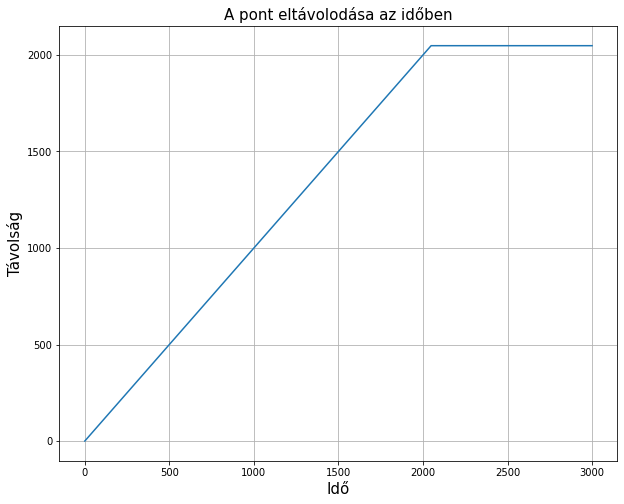

In [19]:
figsize(10,8)
plt.xlabel("Idő", size = 15)
plt.ylabel("Távolság", size = 15)
plt.title("A pont eltávolodása az időben", size = 15)
grid(True)
plot(x,y)

## 7. feladat

Az $f$ függvény jobboldali első deriváltját $x$ pontban közelíthetjük a $h$ inkrementumú differenciával, és $h$-val tartunk 0-ba:

$$FD:\quad\lim_{h\rightarrow 0}\, \frac{f(x+h)-f(x)}{h}.$$

Vesse egybe a $\sin$ függvény közelítő deriváltját az analitikus alakkal:

$$E=|FD(\sin, x, h)-\cos(x)|.$$

Mit tapasztal? Például $x=1$ pontban ábrázolja log-log ploton, hogyan viselkedik a hiba ($E$) $h$ függvényében.
Diszkuttálja a tapasztaltakat.

In [20]:
def derivative(function,data,h):
    return (function(data+h)-function(data))/h

In [21]:
E = derivative(sin,1,1) - cos(1)

In [22]:
step = 1000
time = list(range(step))
hstart = 100
h = hstart
hs = []
y = []
for iteration in range(step):
    
    y.append(derivative(sin,1,h) - cos(1))
    hs.append(h)
    h-=hstart/step
    

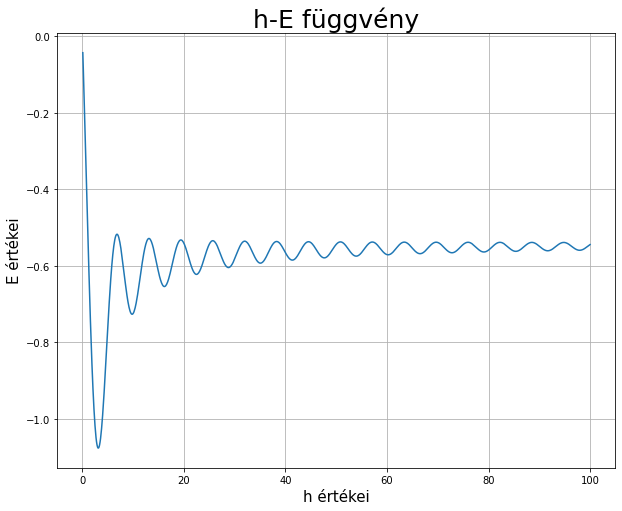

In [23]:
ylabel("E értékei",size = 15)
xlabel("h értékei", size = 15)
title("h-E függvény", size = 25)
grid(True)
plot(hs,y)

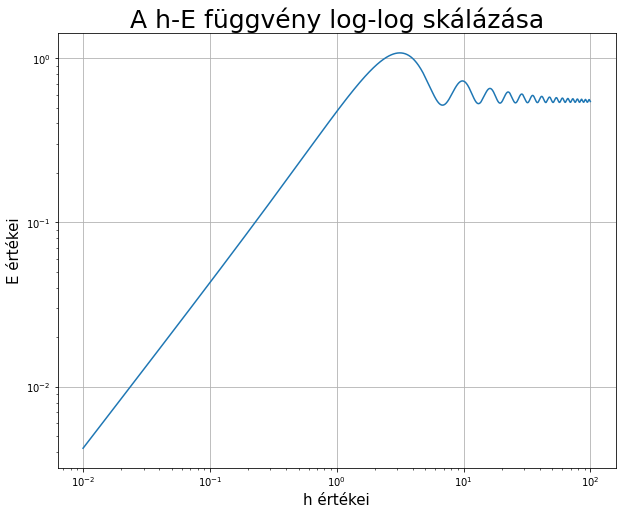

In [24]:
#Loglog skálázás

def derivative(function, data, h):
    return (function(data + h) - function(data)) / h

step = 10000
time = list(range(step))
hstart = 100
h = hstart
hs = []
y = []

for iteration in range(step):
    error = abs(derivative(np.sin, 1, h) - np.cos(1)) #vettem az abszolút értékét, mert a negatív értékeket nem engedte skálázni
    y.append(error)
    hs.append(h)
    h -= hstart / step

figsize(10,8)
plt.loglog(hs, y)  # Skálázás elvégzése
plt.xlabel('h értékei',size = 15 )
plt.ylabel('E értékei' , size = 15)
plt.title('A h-E függvény log-log skálázása', size = 25)
plt.grid(True)
plt.show()


Ha $10^0$-nál kisebb nagyságrendű lépésközöket alkalmazunk, akkor lényegesen kisebb hibákat fogunk kapni. Meglepő módón $10^0$ nagyságrendű lépésköz fölött se száll a hiba értéke, hanem egyre kisebb oszcillációval közelít egy bizonyos érték felé.